# <center> NETFLIX STOCK PREDICTION

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib as klb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


You can get the dataset from https://www.kaggle.com/code/julioam/netflix-stock-price-prediction-analysis

In [2]:
df=pd.read_csv('./NFLX.csv')

In [3]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
828,2019-04-03,369.260010,373.410004,366.190002,369.750000,369.750000,5376600
113,2016-05-31,102.949997,103.449997,102.129997,102.570000,102.570000,8725700
666,2018-08-09,347.959991,352.440002,345.820007,349.359985,349.359985,4820300
441,2017-09-18,183.610001,185.449997,182.729996,184.619995,184.619995,5359600
659,2018-07-31,331.510010,342.500000,328.000000,337.450012,337.450012,14085400


In [4]:
df.drop('Date',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1007 non-null   float64
 1   High       1007 non-null   float64
 2   Low        1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Adj Close  1007 non-null   float64
 5   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.3 KB


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### UNIVARIATE ANALYSIS

#### HISPLOT

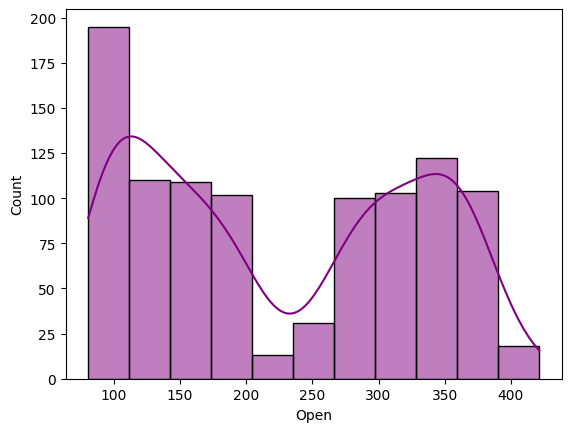

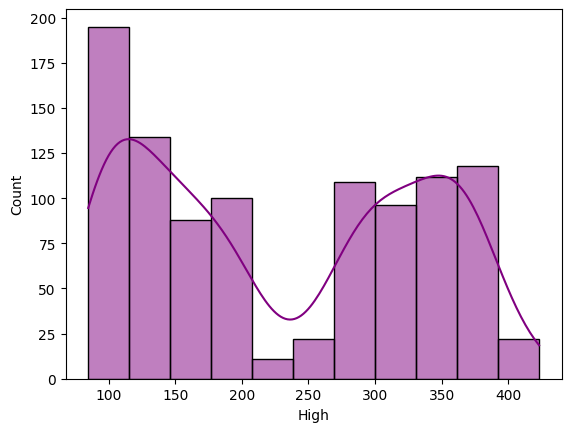

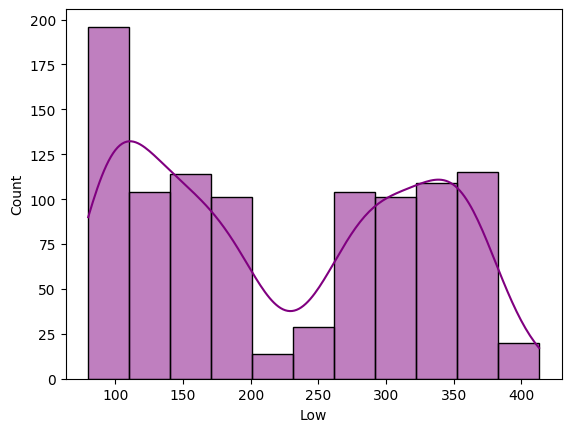

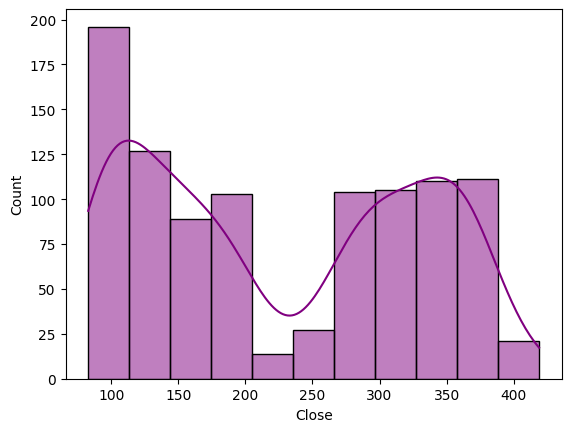

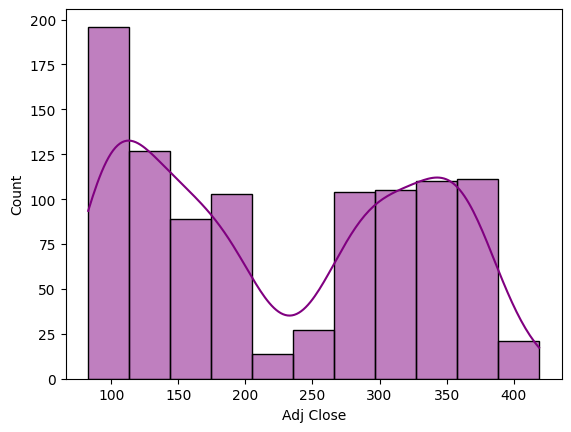

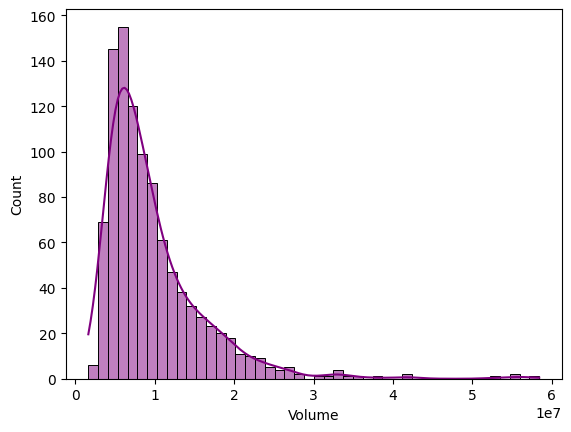

In [7]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

#### BOXPLOT

Removing the outlier values from the dataset 

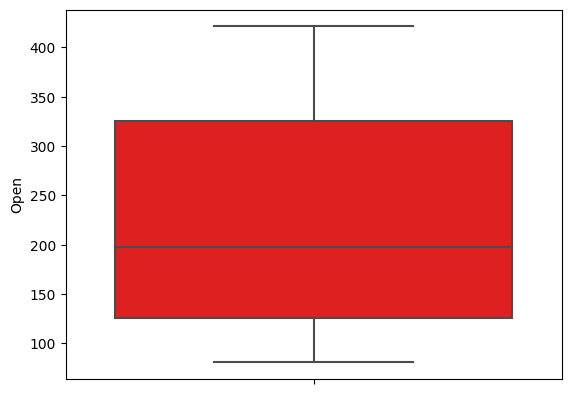

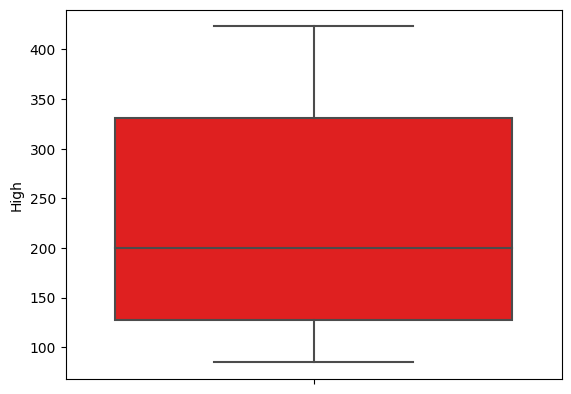

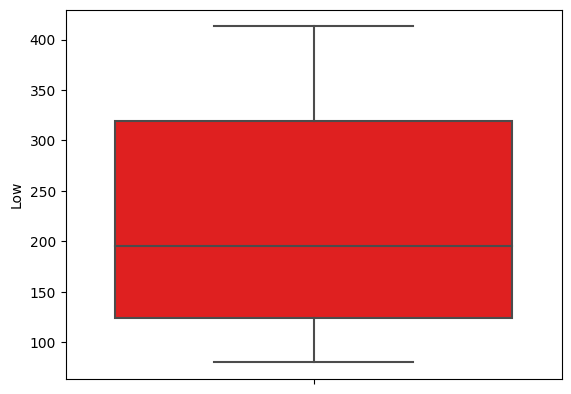

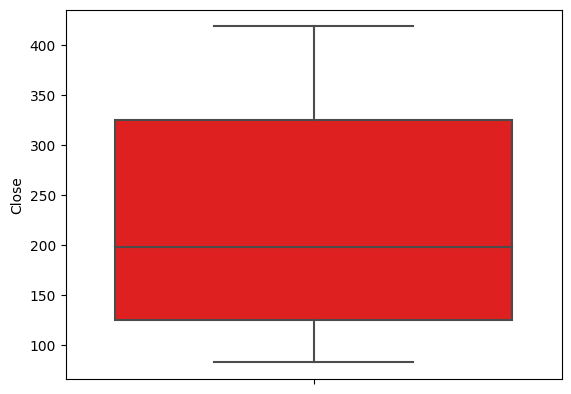

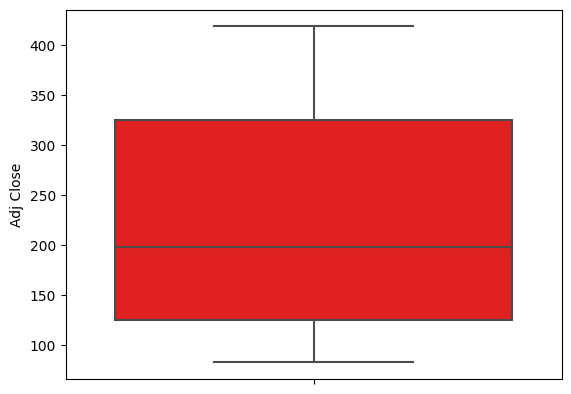

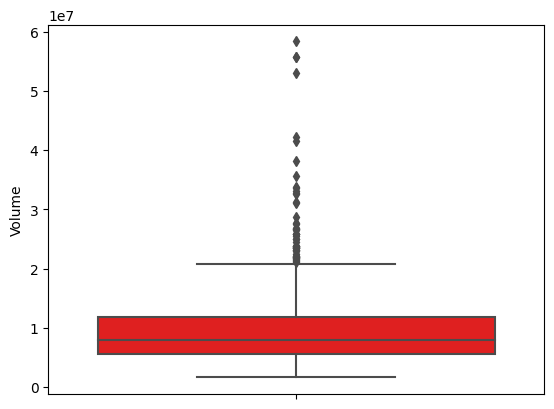

In [8]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show()

In [9]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [10]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

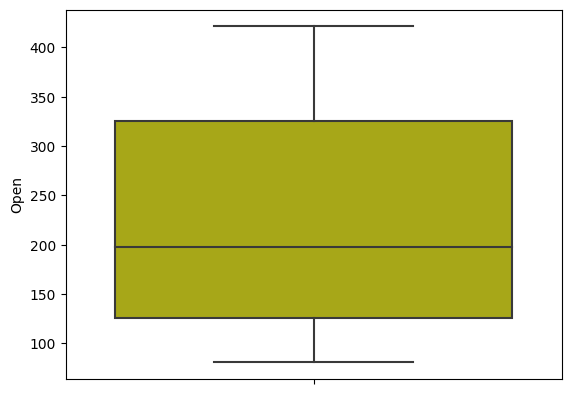

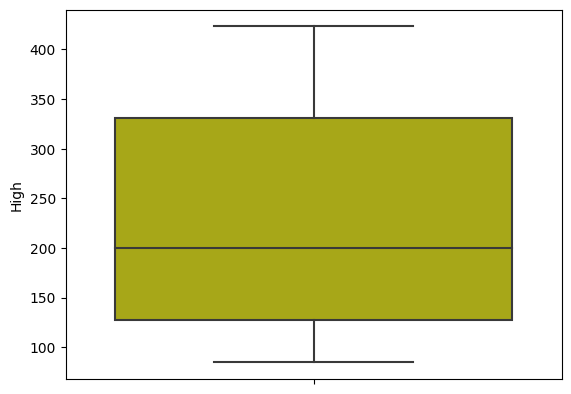

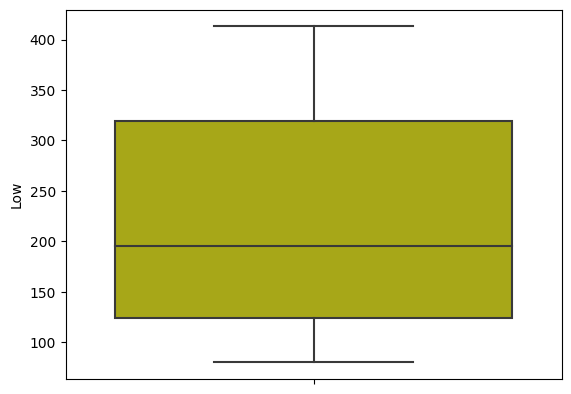

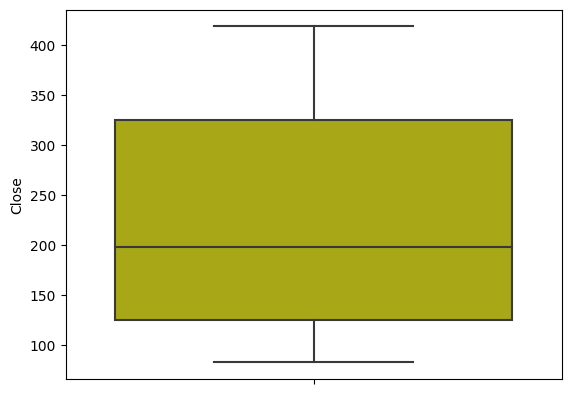

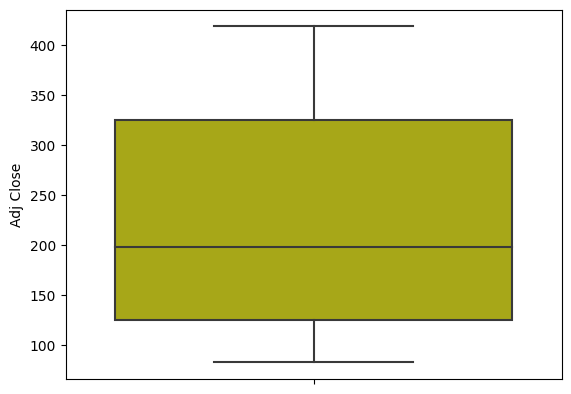

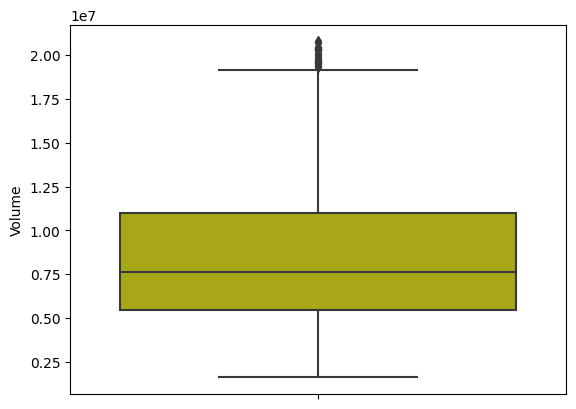

In [11]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [12]:
df.isnull().mean()*100

Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Adj Close    0.000000
Volume       5.163853
dtype: float64

In [13]:
df.fillna(df.mean(),inplace=True)

In [14]:
df.isnull().mean()*100

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [15]:
df.size

6042

#### bivariate analysis

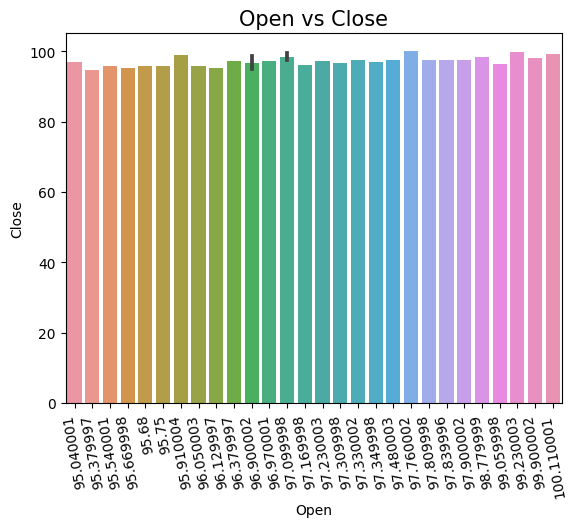

In [16]:
sns.barplot(x="Open", y="Close", data=df[170:200])
plt.title("Open vs Close",fontsize=15)
plt.xticks(rotation=100)
plt.show()
plt.style.use("ggplot")

By the above graph we can understand the relationship between the opening and closing price of the stock.

Text(0.5, 1.0, 'HIGH VS LOW')

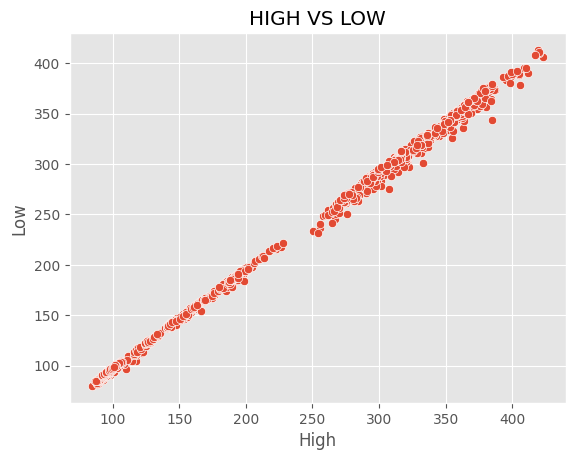

In [17]:
sns.scatterplot(data=df, x='High', y='Low')
plt.title('HIGH VS LOW')


From the above scatterplot graph we can understand the relationship between High price and low price in the dataset

#### HEATMAP

Now Let's check the co-relation between the features of the data using the heatmap

<AxesSubplot: >

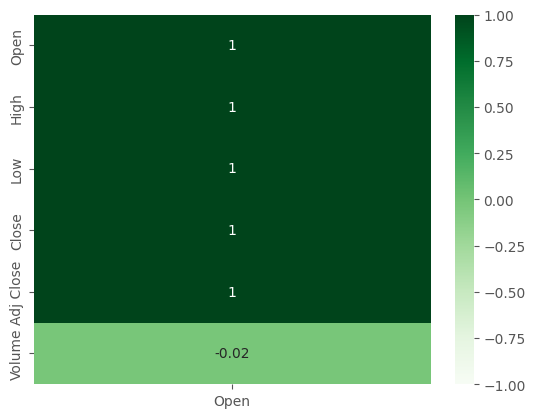

In [18]:
sns.heatmap(df.corr()[['Open']].sort_values(by='Open', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')


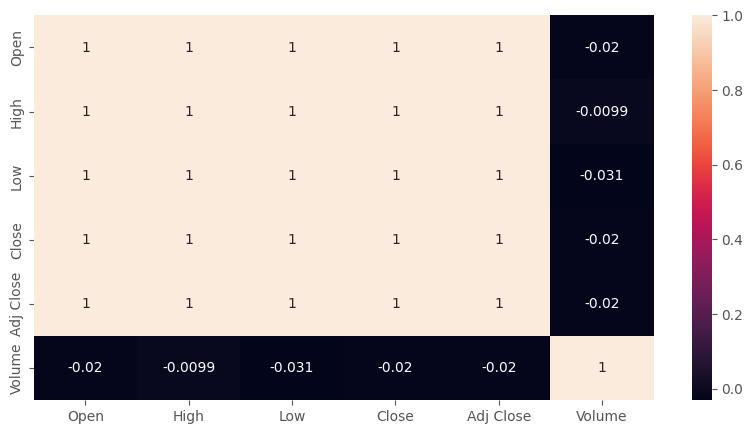

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1007 non-null   float64
 1   High       1007 non-null   float64
 2   Low        1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Adj Close  1007 non-null   float64
 5   Volume     1007 non-null   float64
dtypes: float64(6)
memory usage: 47.3 KB


In [21]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [22]:
x=df[['High','Low','Close']].values
y=df[['Open']].values

Importing the StandardScaler() to convert the 'x' values 

In [23]:
sc=StandardScaler()

In [24]:
x=sc.fit_transform(x)

#### CROSS VALIDATION 

Finding the perfect model for the regression analysis

In [25]:
models={
    'LinearRegression':LinearRegression(),
    
    'Lasso':Lasso(),
    
    'Ridge':Ridge(),
    
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    
    'AdaBoostRegressor':AdaBoostRegressor(),
    
    'RandomForestRegressor':RandomForestRegressor(),
    
    'KneghborsRegressor':KNeighborsRegressor()
}

In [26]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 1.97267807898853
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 2.8838022850422917
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 2.626552168390347
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 4.470567939805855
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 8.796169817848408
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 4.277245244241689
**********************************************************************************************

By cross validation we can find that Linear Regressior is the perfect model for the analysis

In [27]:
lr=LinearRegression()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
print("model trained with {}".format(lr))

training_score = lr.score(x_train, y_train)*100

testing_score = lr.score(x_test, y_test)*100

score = r2_score(y_test, lr.predict(x_test))*100

mae = mean_absolute_error(y_test, lr.predict(x_test))

mse = mean_squared_error(y_test, lr.predict(x_test))

rmse = np.sqrt(mse)

print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearRegression()
r2score:  99.95222894338124
training_score:  99.95586223719695
testing_score:  99.95222894338124
mae:  1.5214574256638336
mse:  4.5722537707239
rmse_test:  2.1382829024064844


In [31]:
y_pred = lr.predict(x)

Let's create a new dataframe called OUTPUT with columns as actual opening price and predicted opening price

In [32]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,119.800003,119.412379
1,123.970001,125.824207
2,120.849998,121.641065
3,119.510002,118.483697
4,117.300003,116.145310
...,...,...
1002,296.119995,297.237741
1003,294.489990,295.401777
1004,295.670013,296.127470
1005,298.500000,300.155385


Now Let's draw a lineplot and scatter to show the difference between the actual and predicted prices in the market

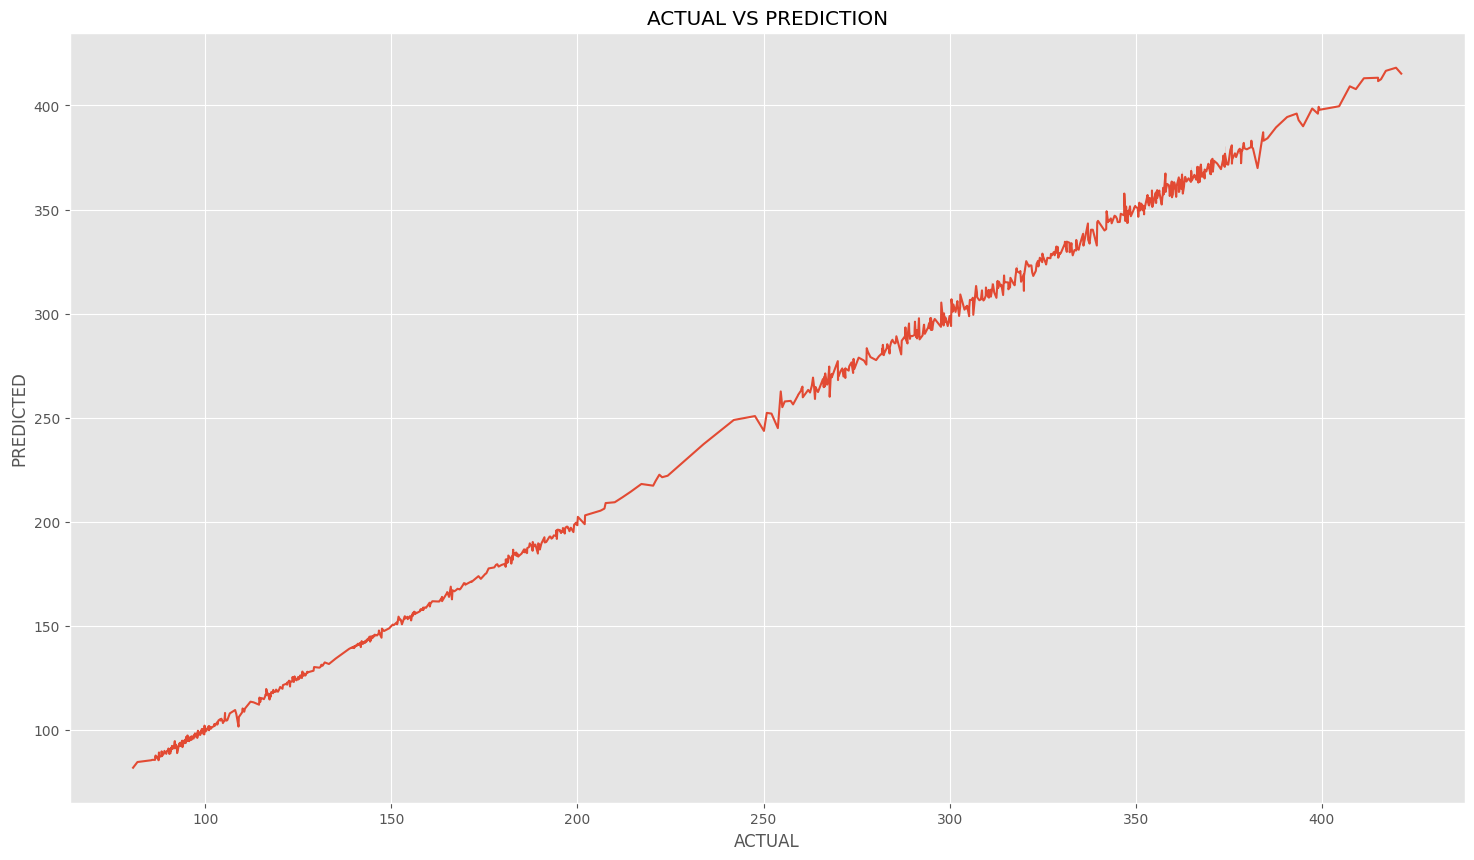

In [33]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

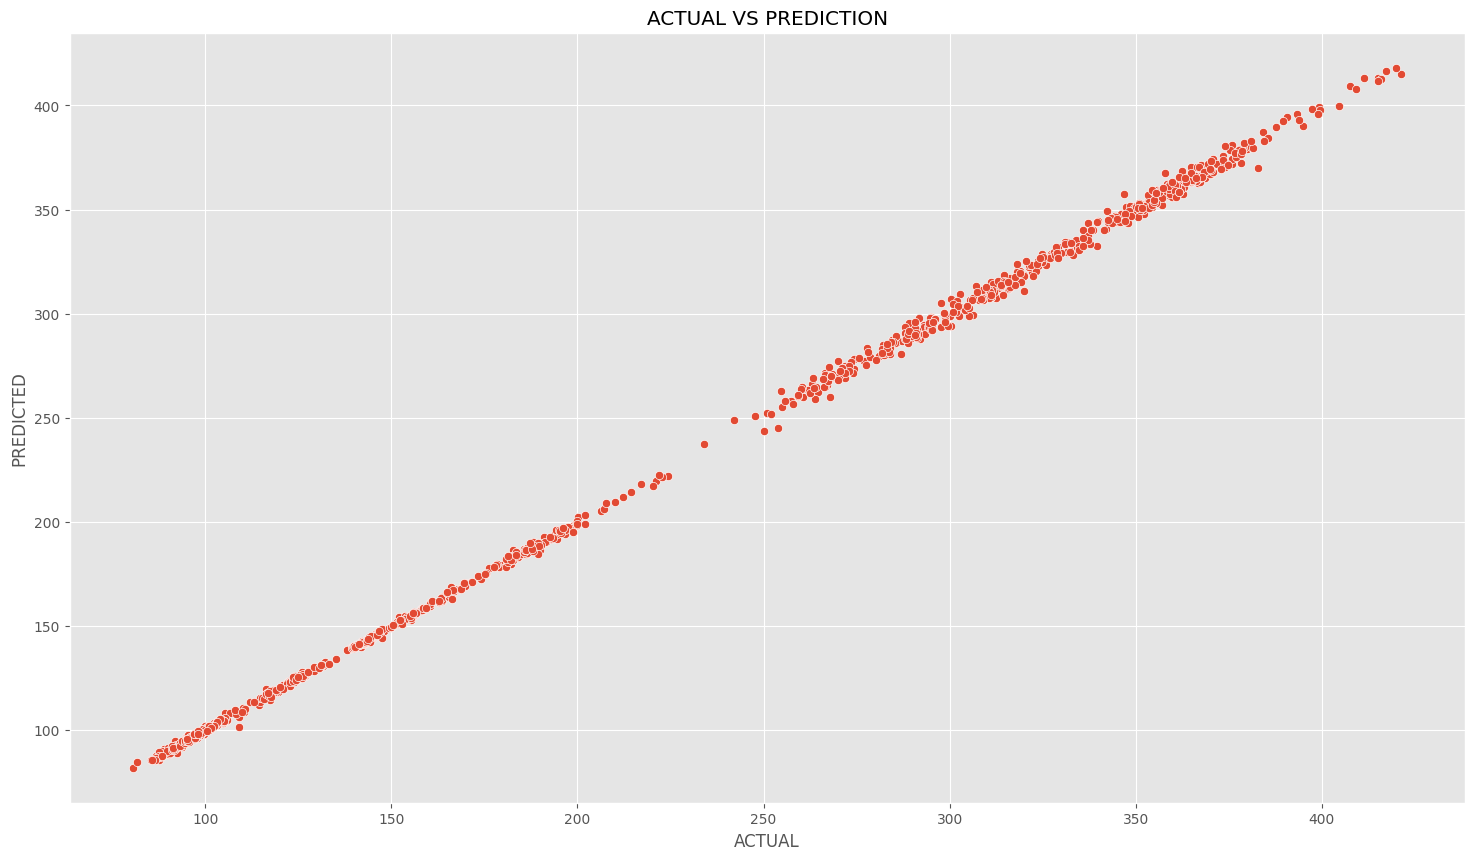

In [34]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()